# Tarea semanal 10
## Martín Deleón

### Consignas:

En esta tarea se solicitó la resolución de los siguientes ejercicios:

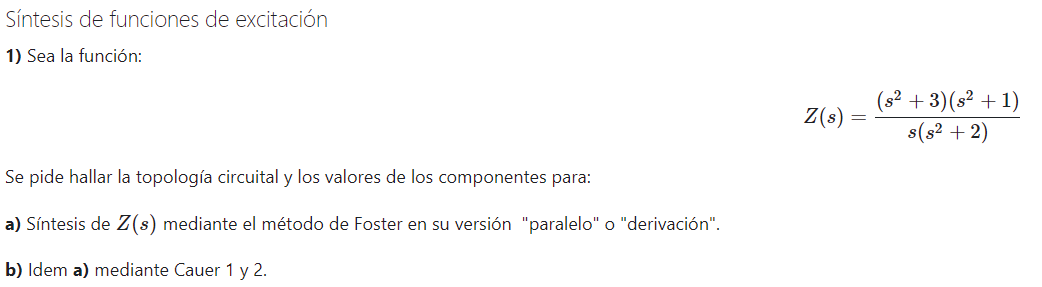
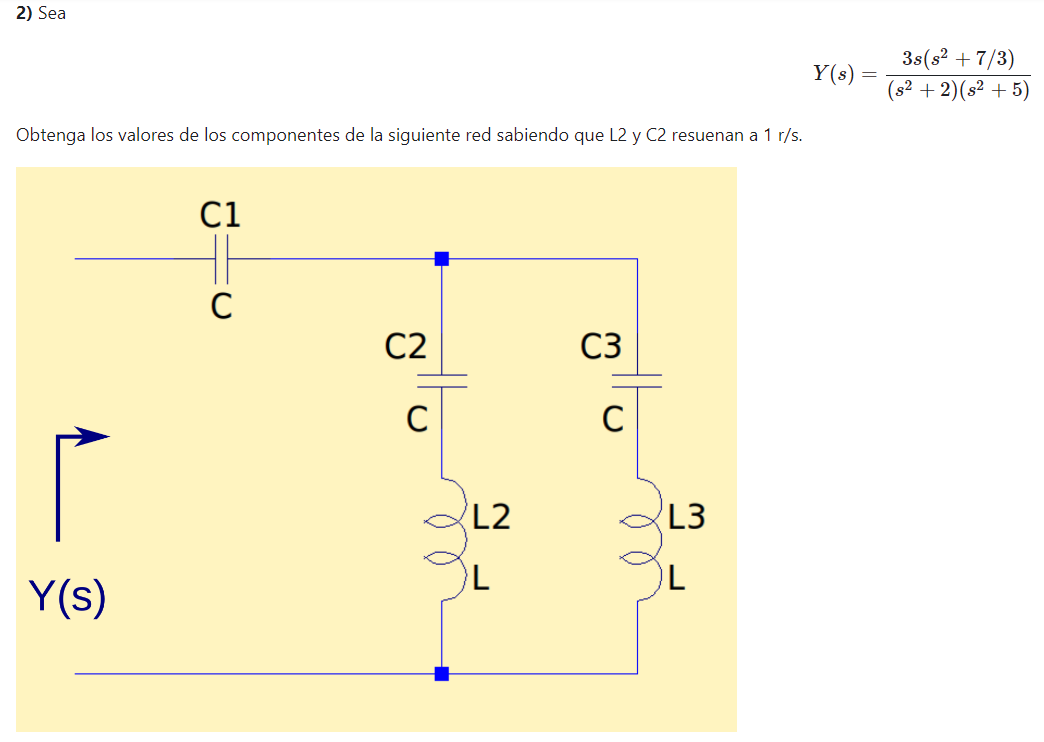



#### Ejercicio 1

In [9]:
from IPython.display import IFrame
IFrame("TS10.pdf", width=1000, height=800)

Ahora se realizá la simulación en Python para comparar o verificar los resultados obtenidos en papel.

In [10]:
from pytc2.sintesis_dipolo import cauer_LC, foster, remover_polo_dc
from pytc2.dibujar import dibujar_cauer_LC, dibujar_foster_serie, dibujar_foster_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
import sympy as sp

In [11]:
s = sp.symbols('s', complex=True)

ZZ = ((s**2 + 3)*(s**2 + 1))/(s*(s**2 + 2))

print_latex(a_equal_b_latex_s('Z(s)', ZZ))

<IPython.core.display.Math object>

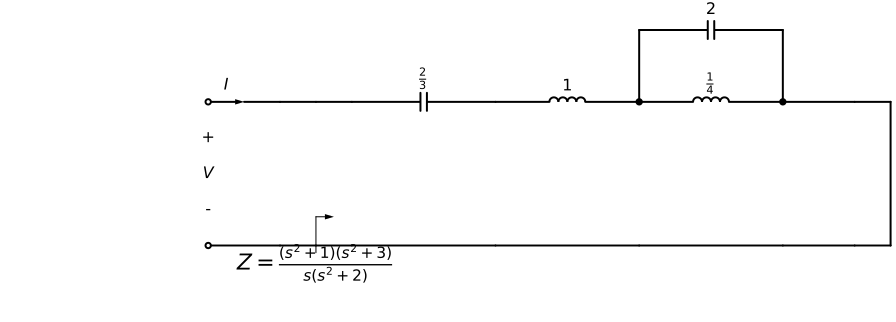

In [12]:
#Sintesis de la impedancia en serie mediante el método de Foster
k0, koo, ki_wi, _, ZZ_foster = foster(ZZ)

dibujar_foster_serie(k0, koo, ki_wi, z_exc = ZZ )

En este punto podemos verificar que el circuito es exactamente igual al obtenido en papel.

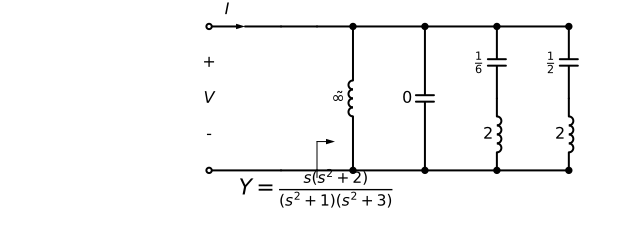

In [13]:
# Primero se convierte la función en una admitancia para poder sintetizarla con foster derivación
YY = 1/ZZ

k0, koo, ki_wi, _, YY_foster = foster(YY)

dibujar_foster_derivacion(k0, koo, ki_wi, y_exc = YY )

Nuevamente podemos verificar que el es el mismo circuito que el obtenido en el pelpa.

<IPython.core.display.Math object>

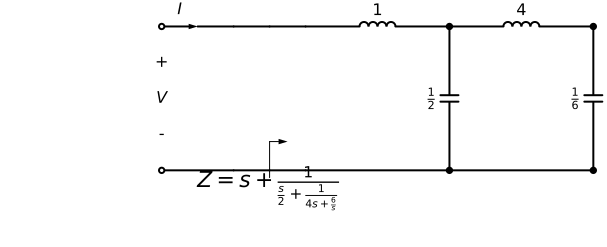

In [14]:
# Se realiza el el trabajo con Cauer 2 o remociones en infinito

# Implementamos la función removiendo polos en el infinito
k0, F_cauer_0, rem = cauer_LC(ZZ, remover_en_inf=True)
print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(s)', ZZ)[1:-1], F_cauer_0 ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(k0, z_exc = F_cauer_0)

<IPython.core.display.Math object>

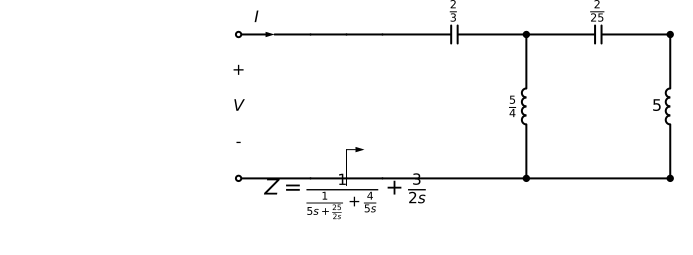

In [15]:
#Repetimos el tranajo pero con remociones en cero.
# Implementaremos F mediante Cauer 1 o remociones continuas en cero
k0, F_cauer_0, rem = cauer_LC(ZZ, remover_en_inf=False)
print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(s)', ZZ)[1:-1], F_cauer_0 ))
# Se dibuja la impedancia esperada
dibujar_cauer_LC(k0, z_exc = F_cauer_0)

Ahora que tenemos la simulación realizada, podemos verificar que lo obtenido en el papel es correcto, dado que llegamos a los mismos resultados.

#### Ejercicio 2
Dado que la consigna remarca la frecuencia de resonancia de una de las ramas en $w=1\frac{rad}{s}$. Esta singularidad no la vemos a simple vista en la función exitación. Para poder obtener una singularidad en ese punto se necesitará realizar una remoción parcial de otra singularidad para poder conseguir el cero o polo deseado.

Para poder comprobar el análisis se realiza una pequeña simulación en python. Como no se encontraron funciones que realicen remociones parciales y luego continuén con las remociones de la transferecnia resultante, se realiza a mano la remoción parcial del polo en cero y luego se utiliza el método de foster para sintetizar las ramas LC en derivación.

In [16]:
s = sp.symbols('s', complex=True)

YY = (3*s*(s**2 + 7/3))/((s**2 + 2)*(s**2 + 5))

print_latex(a_equal_b_latex_s('Y(s)', YY))

<IPython.core.display.Math object>

In [18]:
# REmoción parcial del polo en el origen

k0, Z1 = remover_polo_dc(1/ YY, omega_zero= 1)

print_latex(a_equal_b_latex_s('Z1(s)', Z1))

Z2 =sp.simplify(( 1/YY - Z1))

print_latex(a_equal_b_latex_s('Z2(s)', Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>



######################
# Fallo la expansión #
######################



<IPython.core.display.Math object>

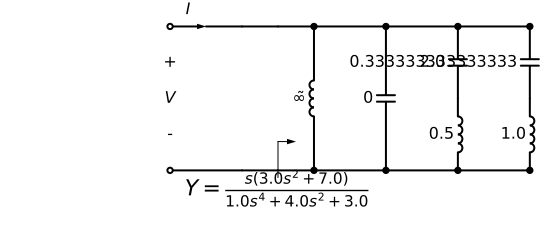

In [19]:

# Síntesis por foster lo que resta de la transferencia
k0, koo, ki_wi, _, FF_foster = foster(1/Z2)
dibujar_foster_derivacion(k0, koo, ki_wi, y_exc = 1/Z2)

Podemos ver en este punto que dice: Fallo la expansión. No logro encontrar el error, pero la sintesis que realiza es correcta por lo que decidi ignorarlo.

Vemos como obtenemos dos ramas LC en derivación de las cuales una resuena a $w = 1 \frac{rad}{s}$ como fue solicitado en la consigna.

### Conclusión
Esta tarea reforzó los conceptos vistos en la teoría sobre los distintos métodos de síntesis de funciones exitación. Es destacable la facilidad que presentan los métodos sistemáticos de Cauer frente a Foster, la divición sucesiva de polinomios se resuelve rápidamente y permite crear redes escalera de manera rápida. Por otro lado se obvservó lo útil que es realizar remociones parciales de los polos para poder ubicar los ceros en el lugar donde uno los necesite.